In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import linregress
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
# Read in CSV files as dataframes
gdp_and_health_df = pd.read_csv('Resources/gdp_health_per_cap.csv')
historical_health_df = pd.read_csv('Resources/historical_health_percent.csv')
main_df = pd.read_csv('Resources/main_table.csv')


In [3]:
# Clean the DataFrame
gdp_health_clean = gdp_and_health_df.dropna(how='any')
gdp_health_clean.head(1)

,Time,Time Code,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,YR2018,Australia,AUS,50192.957328,5337.97600331473


In [4]:
gdp_health_clean.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]'],
      dtype='object')

In [5]:
# Removing unwanted columns
gdp_health_reduced = gdp_health_clean[['Time', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]']]

gdp_health_reduced.head(1)

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,Australia,AUS,50192.957328,5337.97600331473


In [57]:
# Rename columns 
gdp_health_df = gdp_health_reduced.rename(columns={'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'GDP per capita, PPP (current international $)' , 
                                                   'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]' : 'Current health expenditure per capita, PPP (current international $)'})

# New DataFrame of most recent year with data available* 
#   (2021 has several countries with missing info)
gdp_health_df_2020 = gdp_health_df.loc[gdp_health_df['Time']== '2020']

gdp_health_df_2020

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $)","Current health expenditure per capita, PPP (current international $)"
102,2020,Australia,AUS,53066.490989,5929.98359977503
103,2020,Austria,AUT,57258.690227,6400.89537826853
104,2020,Belgium,BEL,54569.925385,5883.08141973941
105,2020,Canada,CAN,47226.365140,6049.90240982382
106,2020,Czechia,CZE,42827.060006,3846.02064653437
107,2020,Denmark,DNK,60832.158291,6350.52094899693
108,2020,Finland,FIN,52305.289311,4896.90850631243
109,2020,France,FRA,48134.959795,5740.38212903533
110,2020,Germany,DEU,56482.475634,7031.94197718211
111,2020,Greece,GRC,28416.523902,2652.95076095773


In [ ]:
values = 

In [7]:
pd.unique(gdp_and_health_df['Country Name'])

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea, Rep.', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'United States', 'Brazil', 'Chile', 'China',
       'Estonia', 'India', 'Indonesia', 'Israel', 'Russian Federation',
       'Slovenia', 'South Africa', 'Latvia', 'Costa Rica', 'Lithuania',
       'Colombia', 'Peru', 'Bulgaria', 'Croatia', 'Romania', 'Argentina',
       'Malta', 'Cyprus', nan], dtype=object)

In [8]:
# Re-cast series as float type
gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_26628\963506661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
C:\Users\chris\AppData\Local\Temp\ipykernel_26628\963506661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expend

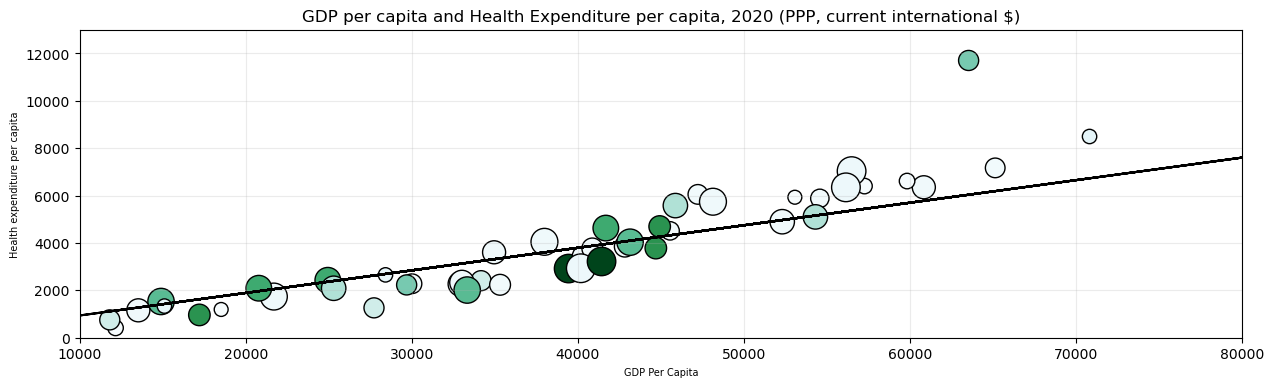

<Figure size 640x480 with 0 Axes>

In [9]:
# Scatter Plot : Gdp per Capita Vs. Health Expenditure per capita (PPP, current international $)

# Determine x & y values
x_values = gdp_health_df_2020['GDP per capita, PPP (current international $)']
y_values = gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)']

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Colors for color mapping
colors=[1300, 2500, 4500, 5000, 5200, 5500, 5900, 6200, 7500, 
        12000, 21000, 28000, 40000, 47000, 55000, 62000, 85420, 1300, 2500, 4500, 5000, 5200, 5500, 5900, 6200, 7500, 
        12000, 21000, 28000, 40000, 47000, 55000, 62000, 85420, 1300, 2500, 4500, 5000, 5200, 5500, 5900, 6200, 7500, 
        12000, 21000, 28000, 40000, 47000, 55000, 62000, 85420]

# Scatter data point sizes based on datapoint value
sizes = [100, 125, 175, 200, 225, 275, 309, 375, 425, 107, 208, 309, 209, 360, 340, 240, 420, 
         100, 125, 175, 200, 225, 275, 309, 375, 425, 107, 208, 309, 209, 360, 340, 240, 420, 
         100, 125, 175, 200, 225, 275, 309, 375, 425, 107, 208, 309, 209, 360, 340, 240, 420]

# Figure size
plt.figure(figsize=(15,4))

# Scatter plot x & y values. Add aesthetics
plt.scatter(x_values,y_values, c=colors, cmap='BuGn', 
            s= sizes, edgecolor='black', linewidth= 1, alpha=1) 
plt.plot(x_values, regress_values, "k-")

# Set x & y limits
plt.xlim(10000, 80000)
plt.ylim(0, 13000)

# Set plot lables & title
plt.xlabel('GDP Per Capita', fontsize=7)
plt.ylabel('Health expenditure per capita', fontsize=7)
plt.title('GDP per capita and Health Expenditure per capita, 2020 (PPP, current international $)')
plt.grid(alpha=.25)
plt.show()
plt.savefig('Output/gdp_health_exp_scatter.pdf')

In [10]:
# New Data Frame without USA data to obtain comparable country average 
all_but_us = gdp_health_df.loc[gdp_health_df['Country Name']!= "United States",:]


In [11]:
# New Data Frame with most recent year data for GDP per capita, PPP (current international $)
all_but_us_2022 =all_but_us.loc[all_but_us['Time']== '2022'] 
#all_but_us_2022

In [12]:
# Calculate average of GDP per Capita for most recent year data (2022)
gdp_avg_2022 = all_but_us_2022["GDP per capita, PPP (current international $)"].mean()
gdp_avg_2022



49481.19702325431

In [13]:
# New DataFrame for 2022 year data
gdp_health_df_2022 = gdp_health_df.loc[gdp_health_df['Time']== '2022']
#gdp_health_df_2022

In [14]:
# New DataFrame with most recent year data for Health expenditure per capita
all_but_us_2020 = all_but_us.loc[all_but_us['Time']== '2020'] 
#all_but_us_2020

In [15]:
# Cast health expenditure coulmn as float for mean calculation
all_but_us_2020["Current health expenditure per capita, PPP (current international $)"] = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_26628\662946502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_but_us_2020["Current health expenditure per capita, PPP (current international $)"] = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')


In [16]:
# Calculate average of health expenditure per Capita for most recent year data
health_avg_2020 = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].mean()
health_avg_2020

3721.5118186682143

In [17]:
# New DataFrame for 2020 year data
gdp_health_df_2020 = gdp_health_df.loc[gdp_health_df['Time']== '2020']
#gdp_health_df_2020

In [18]:
# Cast Health expenditure per capita column as float
gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_26628\3554296892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')


In [19]:
# Sort values of 2020 data based on Health expenditure data
gdp_health_df_2020 = gdp_health_df_2020.sort_values(by='Current health expenditure per capita, PPP (current international $)')

# Reset index
gdp_health_df_2020 = gdp_health_df_2020.reset_index()

#gdp_health_df_2020

In [20]:
# 19 countries closest to USA in Health Expenditure per capita , PPP (current international $)
comparable_countries_reduced_2020 = all_but_us_2020.loc[all_but_us_2020['Current health expenditure per capita, PPP (current international $)']>= 4047.753611]

#comparable_countries_reduced_2020

In [21]:
# Calculate compartable country avergage of health expenditure per capita for 2020 
comp_health_avg_2020 = comparable_countries_reduced_2020["Current health expenditure per capita, PPP (current international $)"].mean()
comp_health_avg_2020

6048.235061063615

In [22]:
# New DataFrame of comparable countries including USA
comparable_countries_2020 = gdp_health_df_2020.loc[gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)'] >= 4047.753611]

#comparable_countries_2020

In [23]:
# Add new row to new DataFrame: Comparable country average (for Health Expenditure per capita, PPP)
new_row = {'Time' : '2020' , 'Country Name' : 'Comparable Country Avg', 'Country Code' : 'AVG', 'Current health expenditure per capita, PPP (current international $)' : comp_health_avg_2020 }
comparable_countries_2020.loc[len(comparable_countries_2020)] = new_row

#comparable_countries_2020 

C:\Users\chris\AppData\Local\Temp\ipykernel_26628\3964646039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_countries_2020.loc[len(comparable_countries_2020)] = new_row


In [24]:
# Sort values of new DataFrame for barh figure
comparable_countries_2020 = comparable_countries_2020.sort_values(by='Current health expenditure per capita, PPP (current international $)')

#comparable_countries_2020

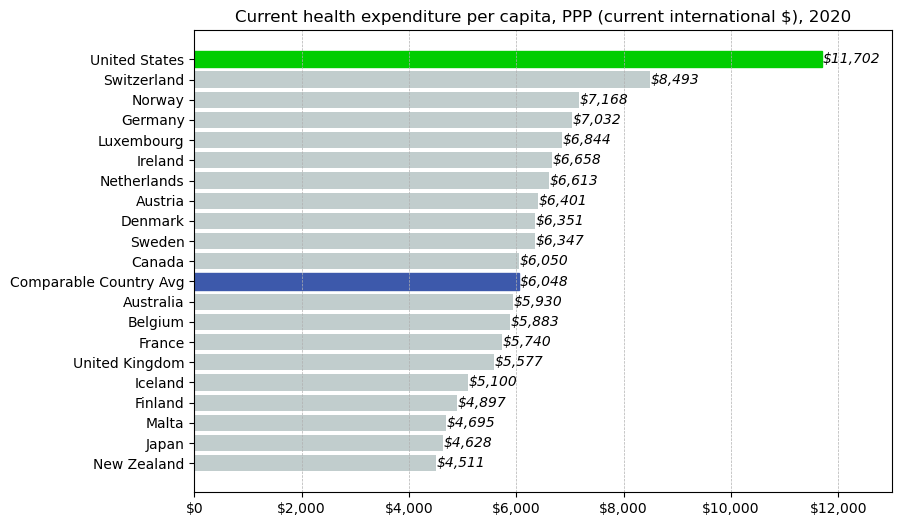

In [25]:
# Plot barh figure. // 19 COUNTRIES CLOSEST TO THE USA, USA & COMPARABLE COUNTRY AVERAGE
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(111)
# Setting barh params , adding aesthetics
ret = ax1.barh(comparable_countries_2020['Country Name'], round(comparable_countries_2020['Current health expenditure per capita, PPP (current international $)'], 2), color='#C1CDCD')
ret[9].set_color('#3D59AB')
ret[20].set_color('#00CD00')

# Adding more aesthetics and annotations 
ax1.xaxis.grid(linestyle = '--', linewidth=0.5)
for pY, pX in enumerate(comparable_countries_2020['Current health expenditure per capita, PPP (current international $)']):
    ax1.annotate("${:,.0f}".format(pX) , xy=(pX+10, pY), fontstyle = 'italic' , va = 'center')
ax1.xaxis.set_major_formatter("${x:,.0f}")
ax1.set_xlim(0, 13000)
ax1.set_title("Current health expenditure per capita, PPP (current international $), 2020")

plt.show()

In [26]:
historical_health_df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]
0,2000,YR2000,Australia,AUS,7.599617
1,2000,YR2000,Austria,AUT,9.203713
2,2000,YR2000,Belgium,BEL,7.999176
3,2000,YR2000,Canada,CAN,8.248144
4,2000,YR2000,Czechia,CZE,5.701030


In [27]:
historical_health_df.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]'],
      dtype='object')

In [28]:
# Reduce dataframe to only the data needed 
historical_health_reduced = historical_health_df[['Time', 'Country Name', 
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]']]

# Rename columns 
historical_health_reduced = historical_health_reduced.rename(columns={'Time' : 'Year', 'Country Name' : 'Country', 
                                                                       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]' :  'Current health expenditure (% of GDP)'})

historical_health_reduced.head(1)

,Year,Country,Current health expenditure (% of GDP)
0,2000,Australia,7.599617


In [29]:
# Clean dataframe, remove NaN
historical_health_reduced.dropna(how='any', inplace=True)

# Verify that dropna worked
#historical_health_reduced

In [30]:
# Prepare dataframe to select 11 random countries from countries columns, not including United States
historical_health_no_usa = historical_health_reduced.loc[historical_health_reduced['Country'] != "United States"]

#historical_health_no_usa

In [31]:
# Extract random sample of 11 countries for analysis, filtering to 1 year to avoid duplicate countries
#historical_health_no_usa = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2000']

#historical_health_no_usa = historical_health_no_usa.sample(n=11, replace=False)

#historical_health_no_usa

In [32]:
# Write sample countries to list for filtering of original dataframe
#sample_countries = historical_health_no_usa['Country'].tolist()

#sample_countries

In [33]:
# Filter original dataframe to sample countries list without the United Satates included
comparable_countries_no_usa = historical_health_reduced.loc[(historical_health_reduced['Country'] =='Greece') | (historical_health_reduced['Country'] == 'Japan') | 
                                                                                                         (historical_health_reduced['Country'] == 'Netherlands') |
                                                                                                           (historical_health_reduced['Country'] == 'South Africa') |
                                                                                                           (historical_health_reduced['Country'] == 'Romania') | 
                                                                                                           (historical_health_reduced['Country'] == 'Poland') |
                                                                                                           (historical_health_reduced['Country'] == 'Mexico') |
                                                                                                           (historical_health_reduced['Country'] == 'Bulgaria') |
                                                                                                           (historical_health_reduced['Country'] == 'Indonesia') |
                                                                                                           (historical_health_reduced['Country'] == 'New Zealand') |
                                                                                                           (historical_health_reduced['Country'] == 'Germany')]

#comparable_countries_no_usa

In [34]:
# Filter original dataframe to sample countries list with the United Satates included
comparable_countries = historical_health_reduced.loc[(historical_health_reduced['Country'] =='Greece') | (historical_health_reduced['Country'] == 'Japan') | 
                                                                                                         (historical_health_reduced['Country'] == 'Netherlands') |
                                                                                                           (historical_health_reduced['Country'] == 'South Africa') |
                                                                                                           (historical_health_reduced['Country'] == 'Romania') | 
                                                                                                           (historical_health_reduced['Country'] == 'Poland') |
                                                                                                           (historical_health_reduced['Country'] == 'Mexico') |
                                                                                                           (historical_health_reduced['Country'] == 'Bulgaria') |
                                                                                                           (historical_health_reduced['Country'] == 'Indonesia') |
                                                                                                           (historical_health_reduced['Country'] == 'New Zealand') |
                                                                                                           (historical_health_reduced['Country'] == 'Germany') |
                                                                                                           (historical_health_reduced['Country'] == 'United States')]
#comparable_countries

In [35]:
comparable_countries.head(1)

,Year,Country,Current health expenditure (% of GDP)
8,2000,Germany,9.888198


In [36]:
# Calculate the mean of comparable countries for yeach year
health_no_usa_avg_2000 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2000']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2002 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2002']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2004 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2004']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2006 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2006']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2008 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2008']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2010 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2010']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2012 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2012']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2014 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2014']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2016 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2016']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2018 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2018']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2020 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2020']['Current health expenditure (% of GDP)'].mean()


In [37]:
# Add each years comparable country average to dataframe that includes United States
new_index_2000 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2000] = ['2000', 'Comparable Country Avg', health_no_usa_avg_2000]

new_index_2002 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2002] = ['2002', 'Comparable Country Avg', health_no_usa_avg_2002]

new_index_2004 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2004] = ['2004', 'Comparable Country Avg', health_no_usa_avg_2004]

new_index_2006 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2006] = ['2006', 'Comparable Country Avg', health_no_usa_avg_2006]

new_index_2008 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2008] = ['2008', 'Comparable Country Avg', health_no_usa_avg_2008]

new_index_2010 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2010] = ['2010', 'Comparable Country Avg', health_no_usa_avg_2010]

new_index_2012 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2012] = ['2012', 'Comparable Country Avg', health_no_usa_avg_2012]

new_index_2014 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2014] = ['2014', 'Comparable Country Avg', health_no_usa_avg_2014]

new_index_2016 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2016] = ['2016', 'Comparable Country Avg', health_no_usa_avg_2016]

new_index_2018 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2018] = ['2018', 'Comparable Country Avg', health_no_usa_avg_2018]

new_index_2020 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2020] = ['2020', 'Comparable Country Avg', health_no_usa_avg_2020]

comparable_countries.head(1)

C:\Users\chris\AppData\Local\Temp\ipykernel_26628\2013506116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_countries.loc[new_index_2000] = ['2000', 'Comparable Country Avg', health_no_usa_avg_2000]
C:\Users\chris\AppData\Local\Temp\ipykernel_26628\2013506116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_countries.loc[new_index_2002] = ['2002', 'Comparable Country Avg', health_no_usa_avg_2002]
C:\Users\chris\AppData\Local\Temp\ipykernel_26628\2013506116.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

,Year,Country,Current health expenditure (% of GDP)
8,2000,Germany,9.888198


In [38]:
# Sort values so that each comparable country average is within it's corresponding year
comparable_countries = comparable_countries.sort_values(by='Year')
#comparable_countries

In [39]:
# Set index 
comparable_countries = comparable_countries.set_index("Year")

# Format index (year)
comparable_countries.index = pd.to_datetime(comparable_countries.index, format="ISO8601")
comparable_countries.head()

,Country,Current health expenditure (% of GDP)
Year,,
2000-01-01,Germany,9.888198
2000-01-01,Comparable Country Avg,6.642829
2000-01-01,Romania,4.208762
2000-01-01,Bulgaria,5.829710
2000-01-01,Indonesia,1.852977


In [40]:
# Extract each countries data for each year & assing variables
germany_data = comparable_countries.loc[comparable_countries['Country'] == 'Germany']
poland_data = comparable_countries.loc[comparable_countries['Country'] == 'Poland']
greece_data = comparable_countries.loc[comparable_countries['Country'] == 'Greece']
japan_data = comparable_countries.loc[comparable_countries['Country'] == 'Japan']
netherlands_data = comparable_countries.loc[comparable_countries['Country'] == 'Netherlands']
new_zealand_data = comparable_countries.loc[comparable_countries['Country'] == 'New Zealand']
mexico_data = comparable_countries.loc[comparable_countries['Country'] == 'Mexico']
us_data = comparable_countries.loc[comparable_countries['Country'] == 'United States']
indonesia_data = comparable_countries.loc[comparable_countries['Country'] == 'Indonesia']
bulgaria_data = comparable_countries.loc[comparable_countries['Country'] == 'Bulgaria']
romania_data = comparable_countries.loc[comparable_countries['Country'] == 'Romania']
comp_avg = comparable_countries.loc[comparable_countries['Country'] == 'Comparable Country Avg']
south_africa_data = comparable_countries.loc[comparable_countries['Country'] == 'South Africa']



In [41]:
# List of countries for graph legend
country_list = pd.unique(comparable_countries["Country"]).tolist()
country_list

['Germany',
 'Comparable Country Avg',
 'Romania',
 'Bulgaria',
 'Indonesia',
 'United States',
 'South Africa',
 'New Zealand',
 'Netherlands',
 'Mexico',
 'Japan',
 'Greece',
 'Poland']

Text(0, 0.5, '% of GDP')

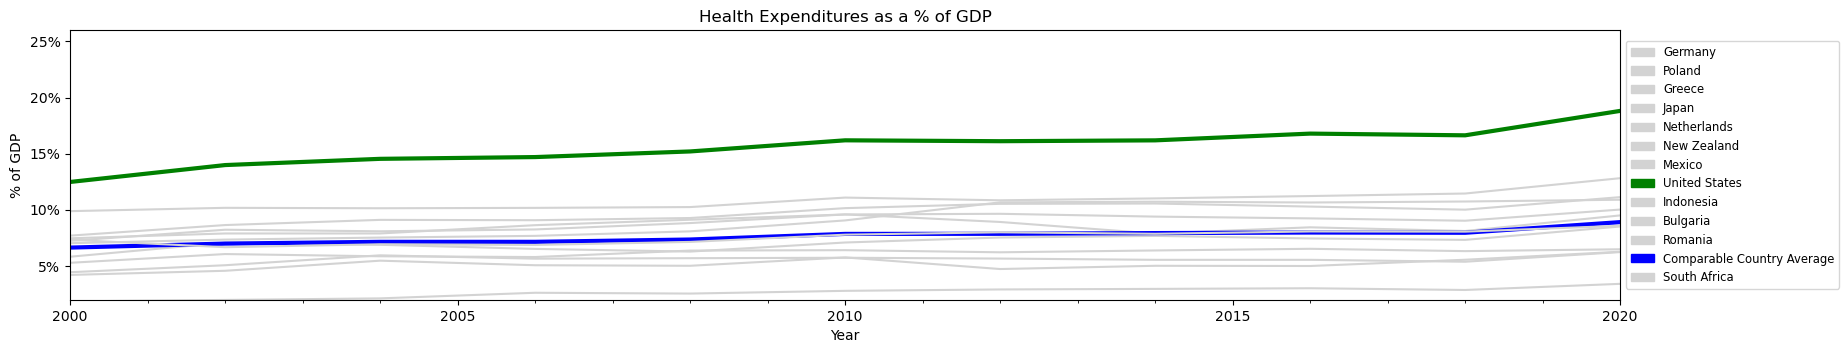

In [42]:
# Plot each countries data // RANDOM SAMPLE OF COUNTRIES, USA & COMPARABLE AVERAGE 
fig, ax = plt.subplots(figsize=(20,3.5))

germany_data.groupby('Country').plot(ax = ax, color='lightgray')
poland_data.groupby('Country').plot(ax = ax, color='lightgray')
greece_data.groupby('Country').plot(ax = ax, color='lightgray')
japan_data.groupby('Country').plot(ax = ax, color='lightgray')
netherlands_data.groupby('Country').plot(ax = ax, color='lightgray')
new_zealand_data.groupby('Country').plot(ax = ax, color='lightgray')
mexico_data.groupby('Country').plot(ax = ax, color='lightgray')
us_data.groupby('Country').plot(ax = ax, color='green', linewidth= 3)
indonesia_data.groupby('Country').plot(ax = ax, color='lightgray')
bulgaria_data.groupby('Country').plot(ax = ax, color='lightgray')
romania_data.groupby('Country').plot(ax = ax, color='lightgray')
comp_avg.groupby('Country').plot(ax = ax, color='blue', linewidth=3)
south_africa_data.groupby('Country').plot(ax = ax, color='lightgray')

# Setting colors for legend
pop_1 = mpatches.Patch(color = 'lightgray', label= 'Germany')
pop_2 = mpatches.Patch(color = 'lightgray', label= 'Poland')
pop_3 = mpatches.Patch(color = 'lightgray', label= 'Greece')
pop_4 = mpatches.Patch(color = 'lightgray', label= 'Japan')
pop_5 = mpatches.Patch(color = 'lightgray', label= 'Netherlands')
pop_6 = mpatches.Patch(color = 'lightgray', label= 'New Zealand')
pop_7 = mpatches.Patch(color = 'lightgray', label= 'Mexico')
pop_8 = mpatches.Patch(color = 'green', label= 'United States')
pop_9 = mpatches.Patch(color = 'lightgray', label= 'Indonesia')
pop_10 = mpatches.Patch(color = 'lightgray', label= 'Bulgaria')
pop_11 = mpatches.Patch(color = 'lightgray', label= 'Romania')
pop_12 = mpatches.Patch(color = 'blue', label= 'Comparable Country Average')
pop_13 = mpatches.Patch(color = 'lightgray', label= 'South Africa')

# Legend, aesthtics
ax.legend(handles=[pop_1, pop_2, pop_3, pop_4, pop_5, 
                   pop_6, pop_7, pop_8, pop_9, pop_10, pop_11,
                   pop_12, pop_13], loc='center left',
                   bbox_to_anchor=(1, 0.5), fontsize='small')
          
# Setting y limits, title, y label, and y tick label format
ax.yaxis.set_major_formatter("{x:.0f}%")
ax.set_ylim(2,26)
ax.set_title('Health Expenditures as a % of GDP')
ax.set_ylabel('% of GDP')

In [43]:
# Cleaning/filtering dataframe to gdp data
gdp_data = gdp_health_df[['Time', 'Country Name', 'GDP per capita, PPP (current international $)']]
#gdp_data

gdp_data = gdp_data.rename(columns={'Time' : 'Year', 'Country Name' : 'Country'})

#gdp_data.head(1)

# Filter and create new dataframes for 2020 and 2022 years
gdp_data_2020 = gdp_data.loc[gdp_data['Year'] == '2020']
gdp_data_2022 = gdp_data.loc[gdp_data['Year'] == '2022']

In [44]:
# Filtering health as percent of GDP in preparation for merged dataframe
health_data_as_percent = historical_health_reduced[['Year', 'Country', 'Current health expenditure (% of GDP)']]
#health_data_as_percent.head(1)

# Filter to 2020 year data
health_as_per_2020 = health_data_as_percent.loc[health_data_as_percent['Year']== '2020']
health_as_per_2020 = health_as_per_2020[['Country','Current health expenditure (% of GDP)']]

# Calculate average
health_as_per_2020_avg = health_as_per_2020['Current health expenditure (% of GDP)'].mean()
health_as_per_2020_avg
#health_as_per_2020.head(1)


9.105309268823529

In [45]:
# Add average back to dataframe as new row
new_index_health = health_as_per_2020.index.max() +1
health_as_per_2020.loc[new_index_health] = ['Comparable Country Avg', health_as_per_2020_avg ]

In [46]:

# Merge Health Expenditures as % of GDP (2020) and GDP per capita (2020) dataframes
health_percent_gdp_2020 = pd.merge(health_as_per_2020, gdp_data_2020, on='Country')
health_percent_gdp_2020 = health_percent_gdp_2020[['Country', 'Current health expenditure (% of GDP)', 'GDP per capita, PPP (current international $)']]
#health_percent_gdp_2020

In [47]:
# Filter new merged df to just gdp data for bar graph
gdp_2020 = health_percent_gdp_2020[['Country', 'GDP per capita, PPP (current international $)']]
#gdp_2020 = gdp_2020.set_index('Country')

# Calculate 2020 GDP average
gdp_2020_avg = gdp_2020['GDP per capita, PPP (current international $)'].mean()

gdp_2020_avg
gdp_2020.head(1)

,Country,"GDP per capita, PPP (current international $)"
0,Australia,53066.490989


In [48]:
# Add 2020 GDP average to dataframe
new_index_gdp = gdp_2020.index.max() +1
gdp_2020.loc[new_index_gdp] = ['Comparable Country Avg', gdp_2020_avg]

C:\Users\chris\AppData\Local\Temp\ipykernel_26628\4066225287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_2020.loc[new_index_gdp] = ['Comparable Country Avg', gdp_2020_avg]


C:\Users\chris\AppData\Local\Temp\ipykernel_26628\832459375.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(gdp_2020['Country'], rotation=90)


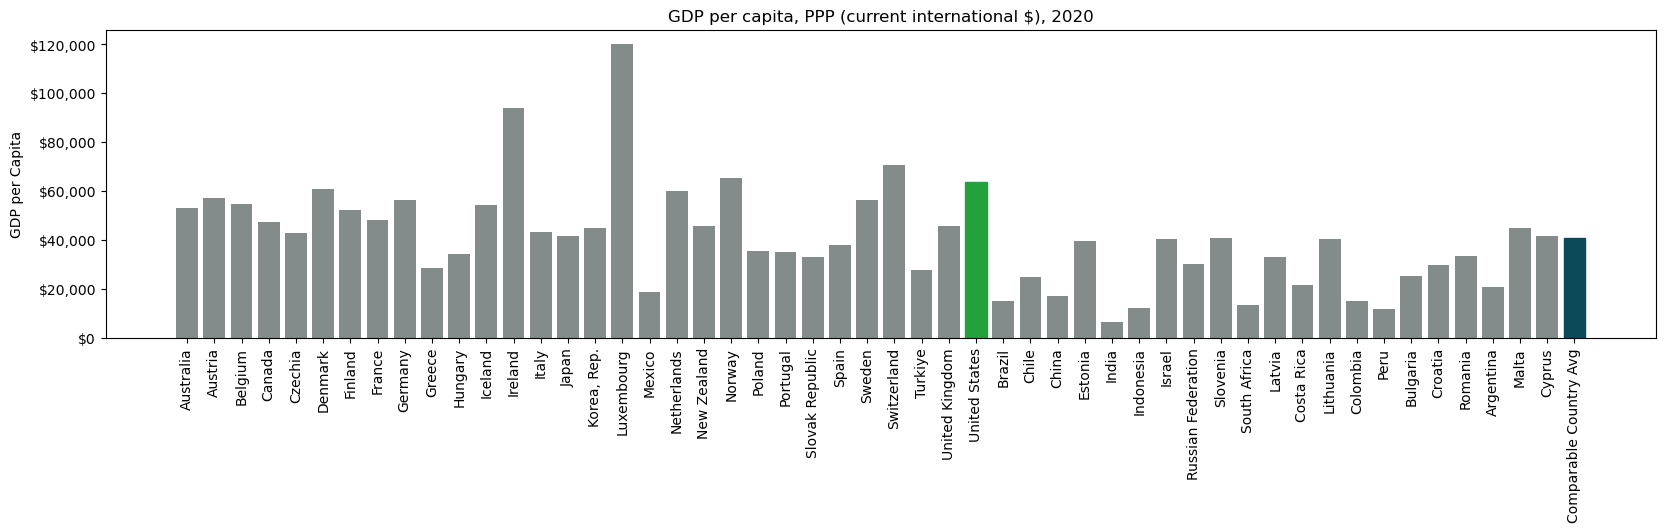

In [49]:
# Plot 2020 GDP per Capita data
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)

ret = ax1.bar(gdp_2020['Country'], gdp_2020['GDP per capita, PPP (current international $)'], color='#838b8b')
ret[29].set_color('#22a13d')
ret[51].set_color("#0d4a59")
ax1.set_xticklabels(gdp_2020['Country'], rotation=90)
ax1.set_title('GDP per capita, PPP (current international $), 2020')
ax1.set_ylabel('GDP per Capita')
ax1.yaxis.set_major_formatter("${x:,.0f}")

In [50]:
# Calculate GDP 2022 average
gdp_2022_avg = gdp_data_2022['GDP per capita, PPP (current international $)'].mean()

#gdp_2022_avg
#gdp_data_2022.head(1)

# Filter GDP 2022 to only needed columns for bar graph
gdp_data_2022 = gdp_data_2022[['Country', 'GDP per capita, PPP (current international $)']]
#gdp_data_2022

In [51]:
# Add 2022 average to dataframe
new_index_gdp_2022 = gdp_data_2022.index.max() +1
gdp_data_2022.loc[new_index_gdp] = ['Comparable Country Avg', gdp_2022_avg]
#gdp_data_2022

C:\Users\chris\AppData\Local\Temp\ipykernel_26628\3803313260.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(gdp_data_2022['Country'], rotation=90)


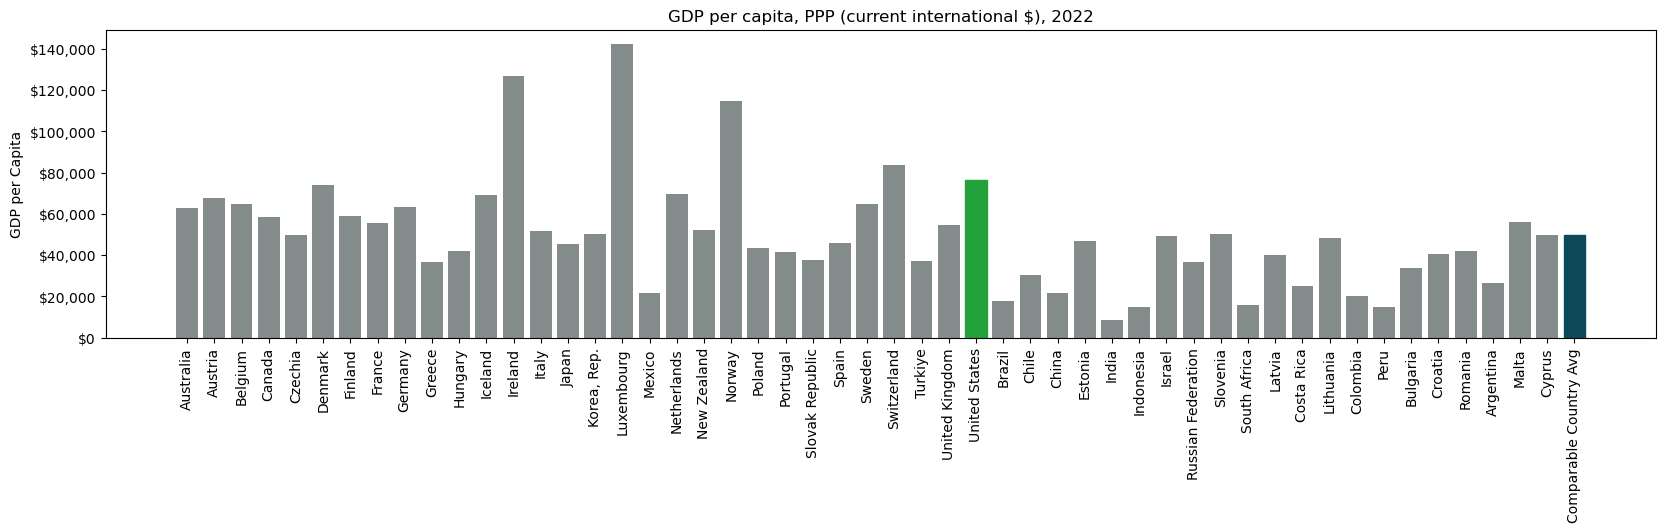

In [52]:
# Plot 2022 GDP per Capita data
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)

ret = ax1.bar(gdp_data_2022['Country'], gdp_data_2022['GDP per capita, PPP (current international $)'], color='#838b8b')
ret[29].set_color('#22a13d')
ret[51].set_color("#0d4a59")
ax1.set_xticklabels(gdp_data_2022['Country'], rotation=90)
ax1.set_title('GDP per capita, PPP (current international $), 2022')
ax1.set_ylabel('GDP per Capita')
ax1.yaxis.set_major_formatter("${x:,.0f}")

In [53]:
# Merge 2020 GDP and 2022 GDP data
gdp_2020_2022 = pd.merge(gdp_2020, gdp_data_2022, on='Country')

# Rename columns for better understanding
gdp_2020_2022 = gdp_2020_2022.rename(columns={'GDP per capita, PPP (current international $)_x' : 'GDP per capita 2020',
                                             'GDP per capita, PPP (current international $)_y' : 'GDP per capita 2022' })

gdp_2020_2022.head(1)

,Country,GDP per capita 2020,GDP per capita 2022
0,Australia,53066.490989,62625.357642


Text(0, 0.5, 'GDP per capita')

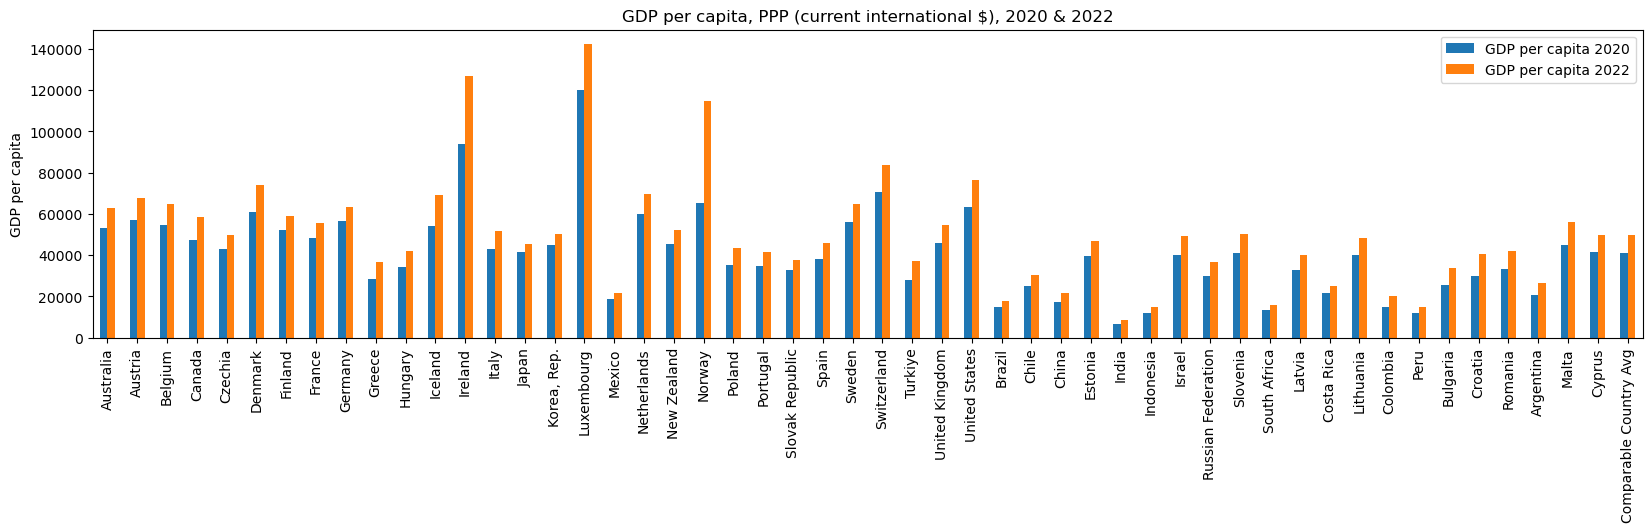

In [54]:
# Plot multi bar graph of 2020 GDP and 2022 GDP data
multi_plot_gdp = gdp_2020_2022.plot(kind='bar', figsize=(20,4))
multi_plot_gdp.set_xticklabels(gdp_2020_2022["Country"], rotation=90)
plt.title('GDP per capita, PPP (current international $), 2020 & 2022')
plt.ylabel('GDP per capita')


In [55]:
health_as_per_2020.reset_index()

,index,Country,Current health expenditure (% of GDP)
0,510,Australia,10.648995
1,511,Austria,11.474260
2,512,Belgium,11.064532
3,513,Canada,12.939675
4,514,Czechia,9.240072
5,515,Denmark,10.528175
6,516,Finland,9.613496
7,517,France,12.205050
8,518,Germany,12.822489
9,519,Greece,9.508207


C:\Users\chris\AppData\Local\Temp\ipykernel_26628\4129108827.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(health_as_per_2020['Country'], rotation=90)


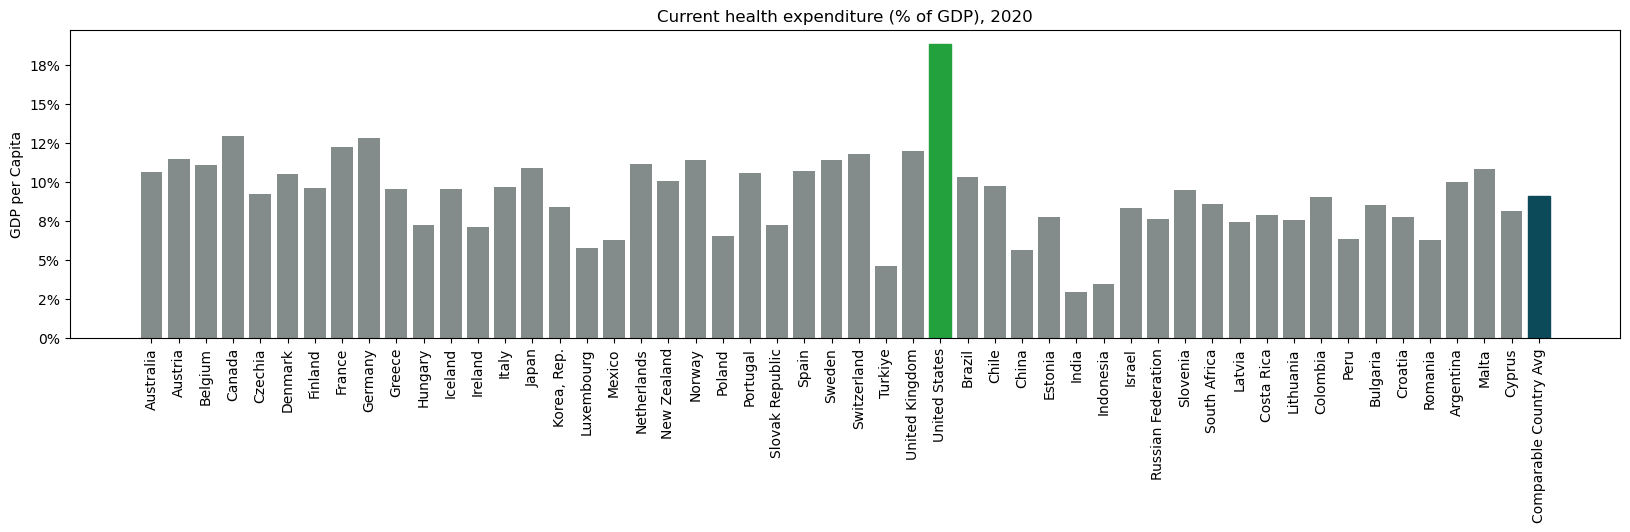

In [56]:
# Plot 2020 Health Expenditure as % of GDP data as bar graph
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)

ret = ax1.bar(health_as_per_2020['Country'], health_as_per_2020['Current health expenditure (% of GDP)'], color='#838b8b')
ret[29].set_color('#22a13d')
ret[51].set_color("#0d4a59")
ax1.set_xticklabels(health_as_per_2020['Country'], rotation=90)
ax1.set_title('Current health expenditure (% of GDP), 2020')
ax1.set_ylabel('GDP per Capita')
ax1.yaxis.set_major_formatter("{x:.0f}%")